In [6]:

import pandas as pd
import matplotlib.pyplot as plt
# required if you use Google Colab
import io 


In [15]:
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded =files.upload()
df =pd.read_csv(io.BytesIO(uploaded['jamalon dataset.csv']))
df.head(15)

Saving jamalon dataset.csv to jamalon dataset.csv


,Unnamed: 0,Title,Author,Description,Pages,Publication year,Publisher,Cover,Category,Subcategory,Price
0,0,فى فقه الصراع على القدس وفلسطين,محمد عمارة,الإسلامية كانت القدس رمز الصراع وبوابة الانتص...,180,2006,دار الشروق – مصر,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,15.00
1,1,الرد على شبهات المستشرقين في السيرة النبوية(3),محمد بن عبد الرزاق اسود,None,86,2017,دار طيبة للنشر والتوزيع,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,15.00
2,2,القصص التربوية عند الشيخ محمد تقي فلسفي,لطيف الراشدي,None,420,0,دار الكاتب العربي للطباعة والنشر,غلاف كرتوني,الأدب والخيال,الأدب الإسلامي,37.50
3,3,باب السلام,الأستاذ الدكتور عبدالوهاب إبراهيم أبو سليمان,None,494,2013,تارة الدولية,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,100.02
4,4,تسبيح الروح,طراد حمادة,None,144,0,دار العلم للطباعة والنشر والتوزيع,غلاف عادي,الأدب والخيال,الأدب الإسلامي,18.75
5,5,خمسون وسيلة لسلامة الصدر,سعد الطخيس,None,184,2016,دار الحضارة للنشر والتوزيع,غلاف كرتوني,الأدب والخيال,الأدب الإسلامي,19.88
6,6,عذراء قريش,جرجي زيدان,"روايات تاريخ الإسلام"" سلسلة من الروايات التار...",176,0,دار البشير للطباعة والنشر والتوزيع,غلاف عادي,الأدب والخيال,الأدب الإسلامي,18.75
7,7,التحفة في أحكام العمرة والمسجد الحرام,فهد العماري,None,358,2017,دار الحضارة للنشر والتوزيع _ السعودية,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,19.88
8,10,رعاية المقاصد في فقه ابي بكر الصديق,التلمساني,None,140,2017,دار طيبة للنشر والتوزيع,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,18.75
9,11,المدخل إلى علوم نهج البلاغة,محسن باقر الموسوي,None,432,0,دار العلوم للتحقيق والطباعة والنشر,غلاف كرتوني,الأدب والخيال,الأدب الإسلامي,33.75


In [16]:
print(df.shape)# number of rows and columns

(8986, 11)


In [33]:
print(df['Category'].unique()) # determine the type of data inside this column


['الأدب والخيال' 'التاريخ والجغرافيا' 'الأسرة والطفل' 'الكتب السياسية'
 'العلوم والطبيعة' 'الرياضة والتسلية' 'الاقتصاد والأعمال'
 'الكتب الإسلامية' 'الصحافة والإعلام' 'الفنون' 'الشرع والقانون' 'الفلسفة'
 'السير والمذكرات']


In [32]:
print(df.groupby('Category').size())


Category
الأدب والخيال         1217
الأسرة والطفل          710
الاقتصاد والأعمال      928
التاريخ والجغرافيا     322
الرياضة والتسلية       174
السير والمذكرات        478
الشرع والقانون          85
الصحافة والإعلام       904
العلوم والطبيعة        870
الفلسفة                905
الفنون                 438
الكتب الإسلامية       1061
الكتب السياسية         894
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


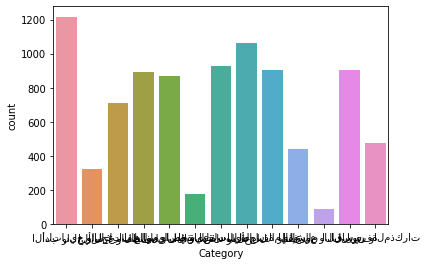

In [26]:
import seaborn as sns
sns.countplot(df['Category'],label="Count")
plt.show()

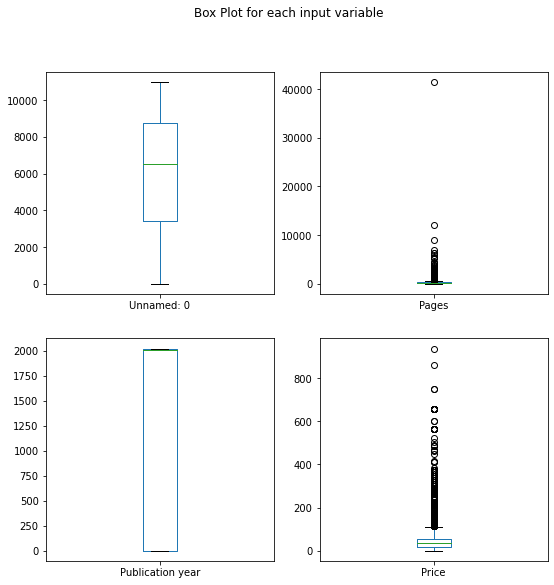

In [31]:
#Visualization
#Box plot for each numeric variable
df.drop('Category', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
         title='Box Plot for each input variable')
plt.savefig('Category_box')
plt.show()

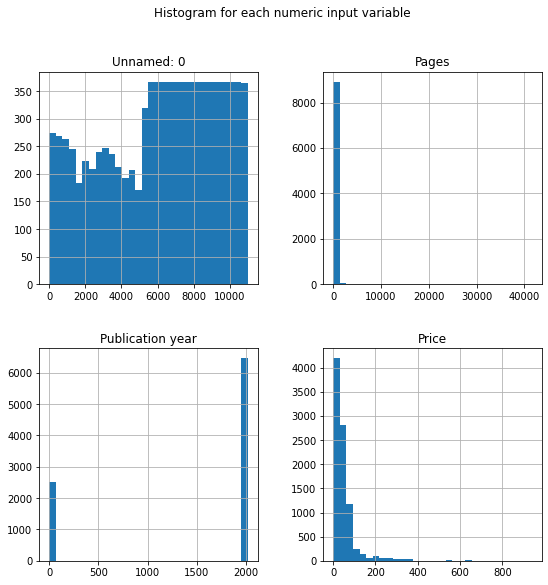

In [30]:
#It looks like perhaps color score has a near Gaussian distribution
import pylab as pl
df.drop('Category' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Category_hist')
plt.show()

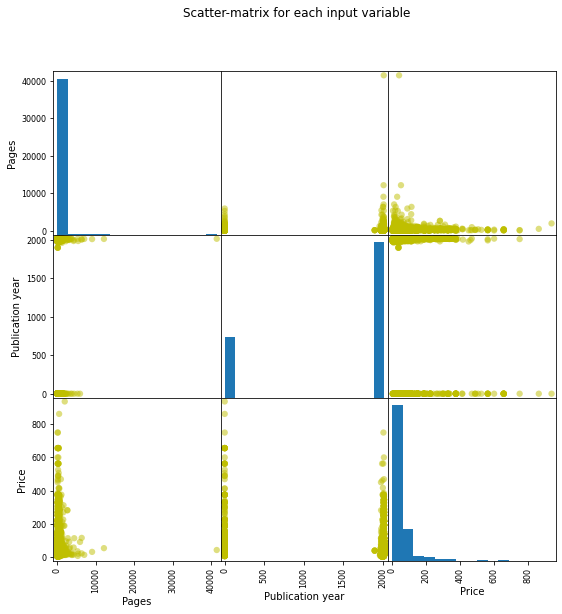

In [41]:
#Some pairs of attributes are correlated (pages,publication year ,and price). This suggests a high correlation and a predictable relationship.
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = [ 'Pages', 'Publication year', 'Price']
X = df[feature_names]
y = df['Category']
cmap = cm.get_cmap('gnuplot')
scatt= scatter_matrix(X, c = "y", marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('Category_scatter_matrix')

In [43]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#Build Models
#Logistic Regression
#to get the accuracy
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.18
Accuracy of Logistic regression classifier on test set: 0.18


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.29


In [46]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.48
Accuracy of K-NN classifier on test set: 0.28


In [47]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.18
Accuracy of LDA classifier on test set: 0.18


In [48]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.15
Accuracy of GNB classifier on test set: 0.16


In [49]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.20
Accuracy of SVM classifier on test set: 0.20


In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[172  20  17   8   2   3   1  13   6  28   7  10  20]
 [ 55  64   6   5   3   2   0   7   9  16   3   4   7]
 [ 28  10  87   2   2   4   3  17  21  21   5  13  21]
 [ 15   4  12  15   0   1   0  10   6   2   5   1   8]
 [ 10   4   3   3   7   2   2   3   5   3   3   5   3]
 [ 17   3  16   1   0  19   0   5   6  22   1  13   6]
 [  1   0   2   1   0   0   7   3   2   0   0   0   1]
 [ 24   6  37   9   1   7   5  72  18   8   7   8  12]
 [ 33  14  48   5   1  11   3  21  34   9   1  16  17]
 [ 48  17  19   4   2  27   1  10  10  57   4  22  15]
 [ 29  12  10   4   0   3   0  15   9   5   6  13   8]
 [ 63   5  35   8   7  19   3  28  18  28   6  43   8]
 [ 41  10  32  10   1   9   2  20  13  18   3  11  49]]
                    precision    recall  f1-score   support

     الأدب والخيال       0.32      0.56      0.41       307
     الأسرة والطفل       0.38      0.35      0.37       181
 الاقتصاد والأعمال       0.27      0.37      0.31       234
التاريخ والجغرافيا       0.20      0.19    

([<matplotlib.axis.XTick at 0x7f109f1cc110>,
 <a list of 5 Text major ticklabel objects>)

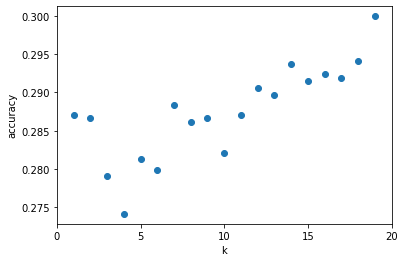

In [52]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])